<a href="https://colab.research.google.com/github/BheemeshPujari/Binary-Classification-with-a-Bank-Churn-Dataset.ipynb/blob/main/Binary_Classification_with_a_Bank_Churn_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task is to predict whether a customer continues with their account or closes it (e.g., churns).objective is to predict the probability of Exited

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/playground-series-s4e1/train.csv')
test_data = pd.read_csv("/content/drive/MyDrive/playground-series-s4e1/test.csv")

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


In [ ]:
train_data

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [ ]:
## Finding any Null values are present or Not
train_data.isnull().sum()

,0
id,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
##Finding any Null Values are present or Not
test_data.isnull().sum()

,0
id,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


## Exploratory Data Analysis

In [ ]:
train_data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


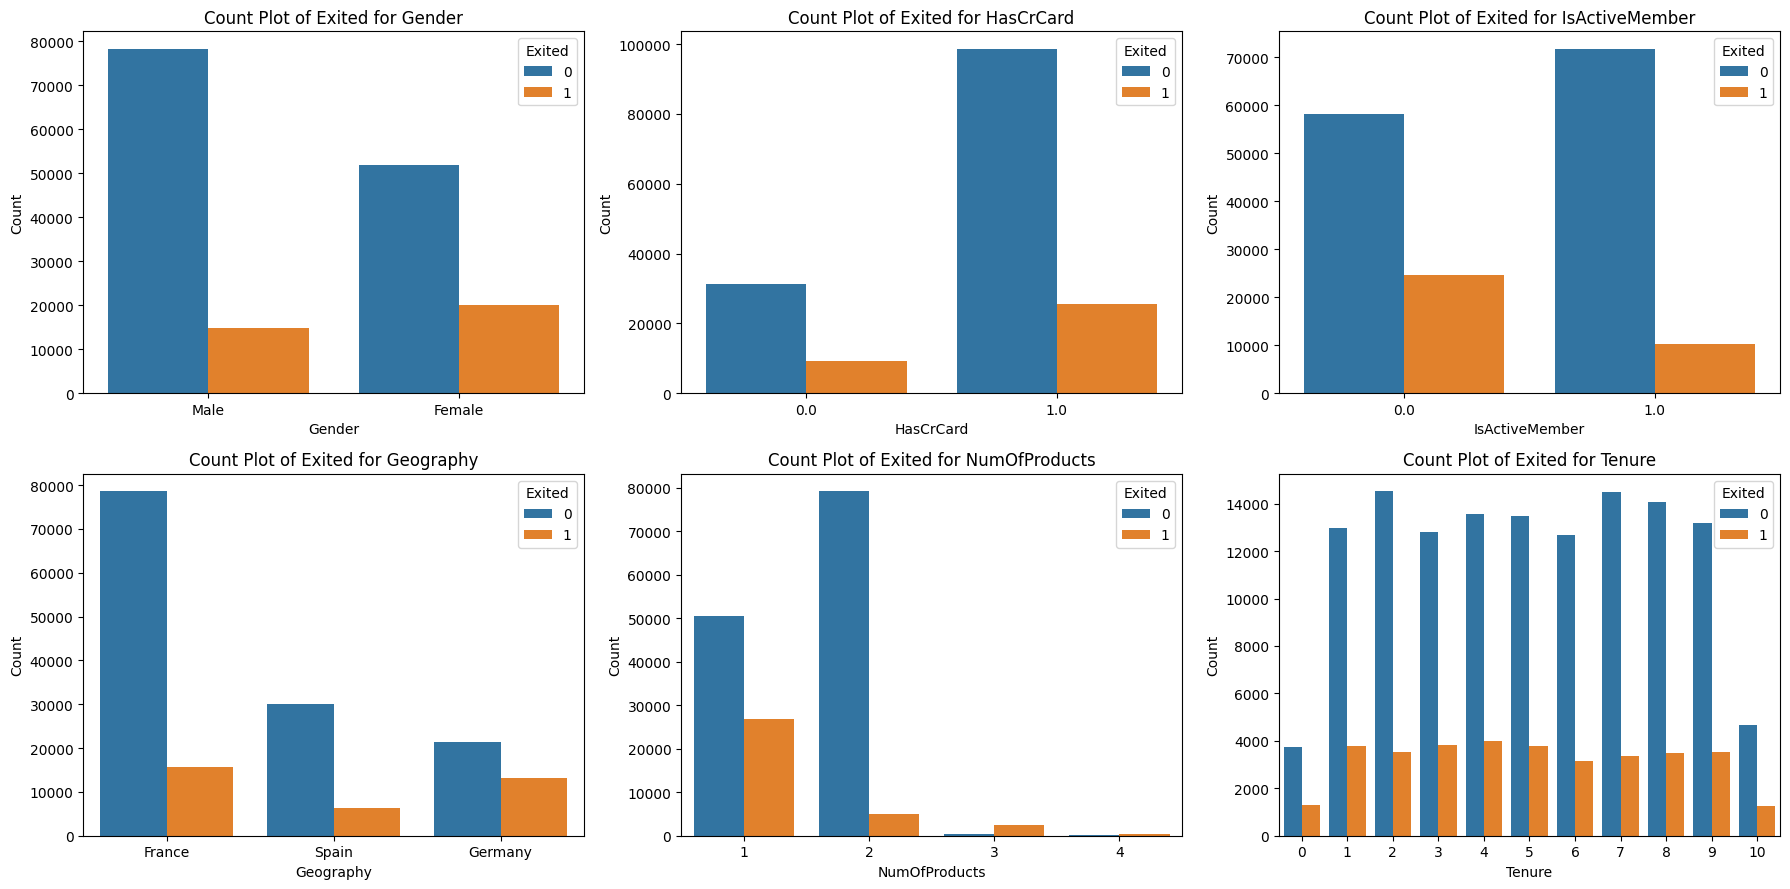

In [ ]:
columns = ['Gender','HasCrCard','IsActiveMember','Geography','NumOfProducts','Tenure']
plt.figure(figsize=(18,9))
for i, column in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=column, hue='Exited', data=train_data)
    plt.title(f'Count Plot of Exited for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Count')

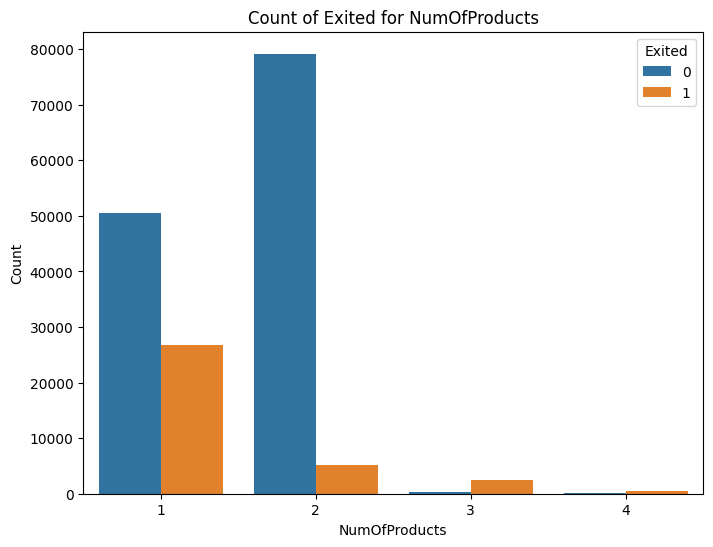

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='NumOfProducts', hue='Exited', data=train_data)
plt.title('Count of Exited for NumOfProducts')
plt.xlabel('NumOfProducts')
plt.ylabel('Count')

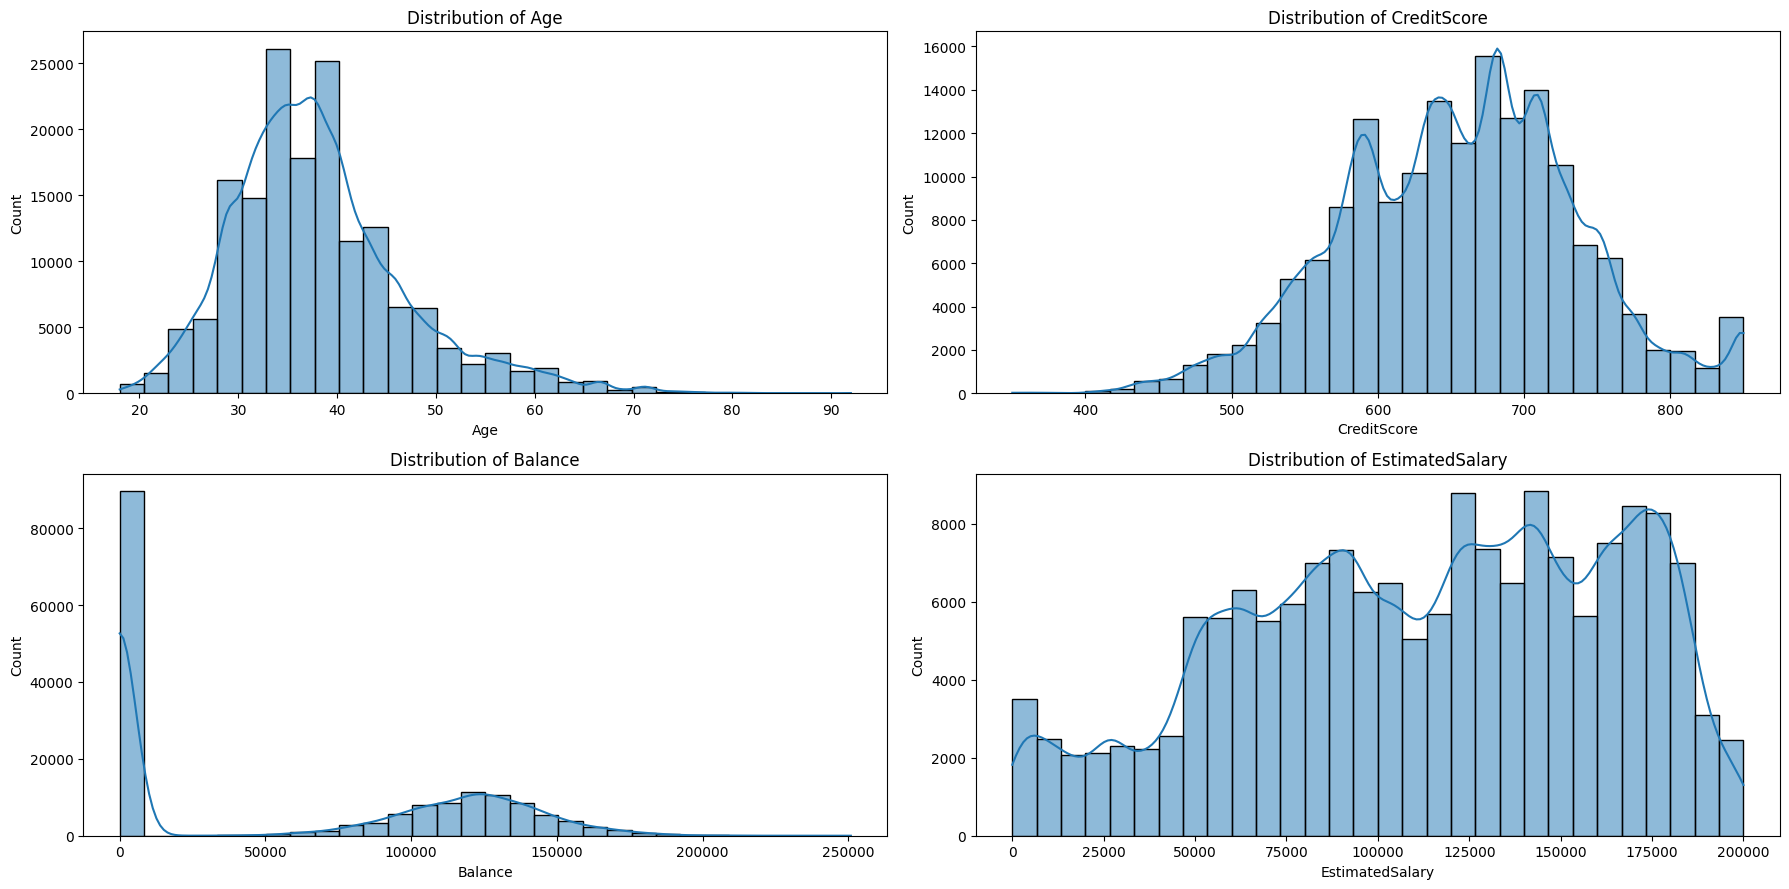

In [ ]:
plt.figure(figsize=(18, 9))
for i, column in enumerate(['Age', 'CreditScore', 'Balance', 'EstimatedSalary'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(train_data[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

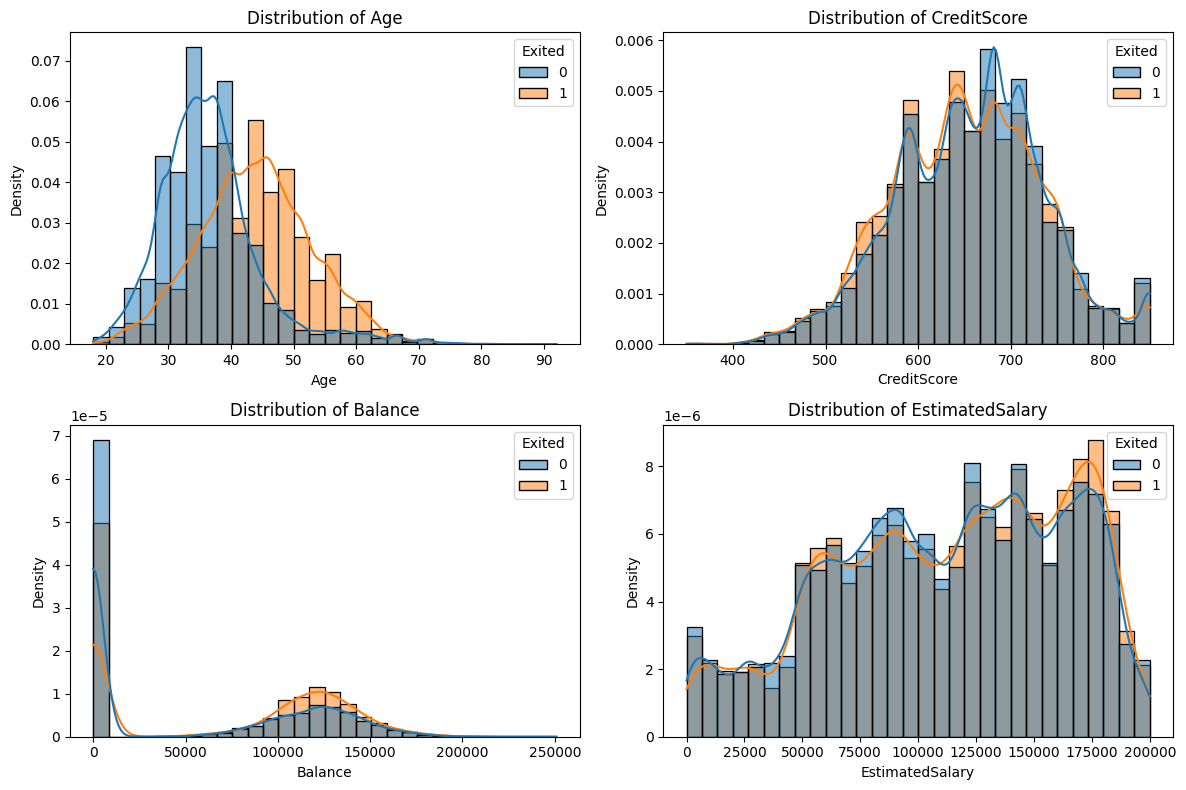

In [ ]:
# Set the style of seaborn
#sns.set(style='whitegrid')

# Plotting histograms with KDE for specified columns
plt.figure(figsize=(12, 8))
for i, column in enumerate(['Age', 'CreditScore', 'Balance', 'EstimatedSalary'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=train_data, x=column, bins=30, kde=True, hue='Exited', stat='density', common_norm=False)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

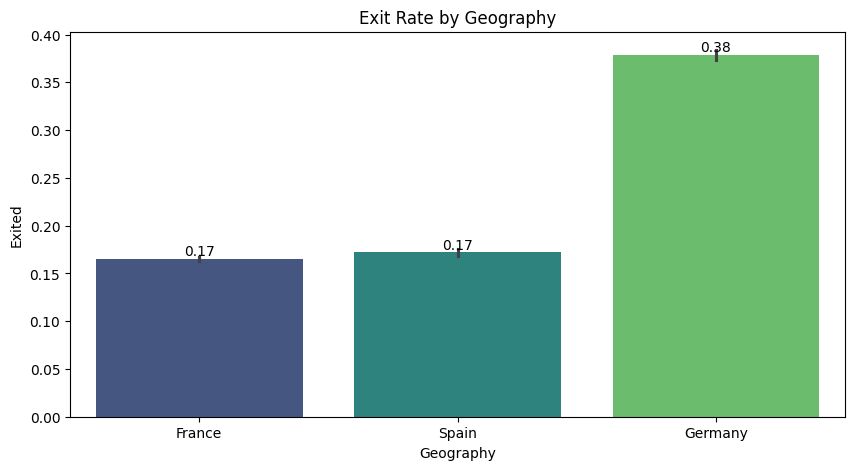

In [ ]:
# Bar Plots
plt.figure(figsize=(10, 5))
ax1=sns.barplot(x='Geography', y='Exited', data=train_data, estimator=lambda x: sum(x) / len(x),palette='viridis')
plt.title('Exit Rate by Geography')
# Annotate the bars with exit rates
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=10)

plt.show()

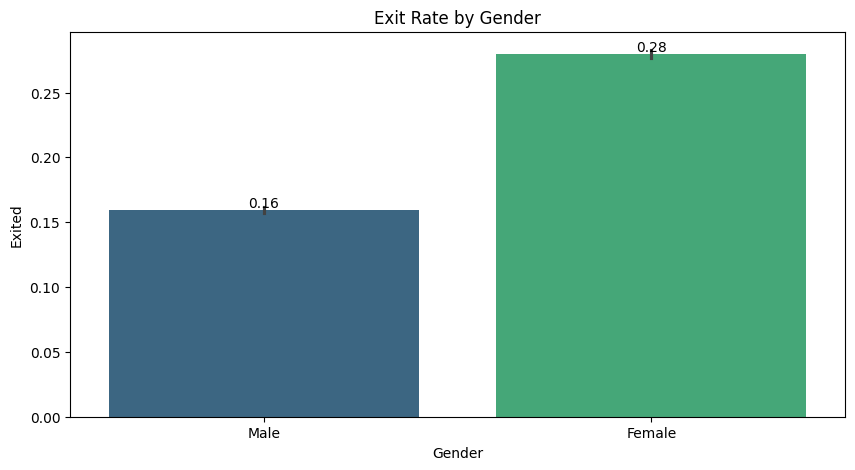

In [ ]:
plt.figure(figsize=(10, 5))
ax2=sns.barplot(x='Gender', y='Exited', data=train_data, estimator=lambda x: sum(x) / len(x),palette='viridis')
plt.title('Exit Rate by Gender')
# Annotate the bars with exit rates
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.2f}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=10)
plt.show()

In [ ]:
test_data['Geography'].unique()

array(['France', 'Germany', 'Spain'], dtype=object)

In [ ]:
col =['HasCrCard','IsActiveMember']
for i in col:
  train_data[i]=train_data[i].astype(int)
  test_data[i]=test_data[i].astype(int)

In [ ]:
#One-Hot Encoding for Gender and Geography
# Initialize separate OneHotEncoders for Gender and Geography
from sklearn.preprocessing import OneHotEncoder

gender_encoder = OneHotEncoder(sparse_output=False)
geography_encoder = OneHotEncoder(sparse_output=False)

# One-Hot Encode Gender
gender_encoded_train = gender_encoder.fit_transform(train_data[['Gender']])
gender_encoded_test = gender_encoder.transform(test_data[['Gender']])
gender_df_train = pd.DataFrame(gender_encoded_train, columns=gender_encoder.get_feature_names_out(['Gender']))
gender_df_test = pd.DataFrame(gender_encoded_test, columns=gender_encoder.get_feature_names_out(['Gender']))

# One-Hot Encode Geography
geography_encoded_train = geography_encoder.fit_transform(train_data[['Geography']])
geography_encoded_test = geography_encoder.transform(test_data[['Geography']])
geography_df_train = pd.DataFrame(geography_encoded_train, columns=geography_encoder.get_feature_names_out(['Geography']))
geography_df_test = pd.DataFrame(geography_encoded_test, columns=geography_encoder.get_feature_names_out(['Geography']))

# Concatenate the one-hot encoded columns back to the original DataFrame
train_data = pd.concat([train_data.drop(['Gender', 'Geography'], axis=1), gender_df_train, geography_df_train], axis=1)
test_data = pd.concat([test_data.drop(['Gender', 'Geography'], axis=1), gender_df_test, geography_df_test], axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# List of numerical columns to normalize
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Apply normalization
train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])
test_data[numerical_columns] = scaler.transform(test_data[numerical_columns])

In [ ]:
train_data

,id,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,0,15674932,Okwudilichukwu,0.636,0.202703,0.3,0.000000,0.333333,1,0,0.907279,0,0.0,1.0,1.0,0.0,0.0
1,1,15749177,Okwudiliolisa,0.554,0.202703,0.1,0.000000,0.333333,1,1,0.247483,0,0.0,1.0,1.0,0.0,0.0
2,2,15694510,Hsueh,0.656,0.297297,1.0,0.000000,0.333333,1,0,0.924364,0,0.0,1.0,1.0,0.0,0.0
3,3,15741417,Kao,0.462,0.216216,0.2,0.593398,0.000000,1,1,0.422787,0,0.0,1.0,1.0,0.0,0.0
4,4,15766172,Chiemenam,0.732,0.202703,0.5,0.000000,0.333333,1,1,0.075293,0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,0.634,0.202703,0.2,0.000000,0.000000,1,1,0.659179,0,1.0,0.0,0.0,0.0,1.0
165030,165030,15665521,Okechukwu,0.884,0.229730,0.3,0.000000,0.000000,0,0,0.659177,0,0.0,1.0,1.0,0.0,0.0
165031,165031,15664752,Hsia,0.430,0.175676,0.5,0.000000,0.000000,1,1,0.637151,0,0.0,1.0,1.0,0.0,0.0
165032,165032,15689614,Hsiung,0.408,0.162162,0.7,0.643819,0.000000,0,1,0.355841,0,1.0,0.0,0.0,0.0,1.0


In [ ]:
test_data

,id,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,165034,15773898,Lucchese,0.472,0.067568,0.2,0.000000,0.333333,0,1,0.804903,1.0,0.0,1.0,0.0,0.0
1,165035,15782418,Nott,0.666,0.378378,0.2,0.000000,0.000000,1,0,0.362723,1.0,0.0,1.0,0.0,0.0
2,165036,15807120,K?,0.612,0.216216,0.7,0.000000,0.333333,1,0,0.694419,1.0,0.0,1.0,0.0,0.0
3,165037,15808905,O'Donnell,0.662,0.243243,0.8,0.000000,0.000000,1,0,0.569654,0.0,1.0,1.0,0.0,0.0
4,165038,15607314,Higgins,0.804,0.270270,1.0,0.483318,0.000000,1,0,0.697164,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,0.440,0.148649,0.7,0.462737,0.000000,1,1,0.740451,0.0,1.0,0.0,0.0,1.0
110019,275053,15774133,Cox,0.450,0.243243,0.4,0.709581,0.000000,1,1,0.210871,1.0,0.0,1.0,0.0,0.0
110020,275054,15728456,Ch'iu,0.724,0.175676,0.2,0.000000,0.333333,1,0,0.081387,0.0,1.0,1.0,0.0,0.0
110021,275055,15687541,Yegorova,0.718,0.189189,0.3,0.000000,0.000000,1,1,0.794101,1.0,0.0,1.0,0.0,0.0


In [ ]:
train_data.drop(['CustomerId','Surname','id'],axis=1,inplace=True)
test_data.drop(['CustomerId','Surname'],axis=1,inplace=True)


In [ ]:
test_data1=test_data.drop(['id'],axis=1,inplace=False)

In [ ]:
test_data1

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,0.472,0.067568,0.2,0.000000,0.333333,0,1,0.804903,1.0,0.0,1.0,0.0,0.0
1,0.666,0.378378,0.2,0.000000,0.000000,1,0,0.362723,1.0,0.0,1.0,0.0,0.0
2,0.612,0.216216,0.7,0.000000,0.333333,1,0,0.694419,1.0,0.0,1.0,0.0,0.0
3,0.662,0.243243,0.8,0.000000,0.000000,1,0,0.569654,0.0,1.0,1.0,0.0,0.0
4,0.804,0.270270,1.0,0.483318,0.000000,1,0,0.697164,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,0.440,0.148649,0.7,0.462737,0.000000,1,1,0.740451,0.0,1.0,0.0,0.0,1.0
110019,0.450,0.243243,0.4,0.709581,0.000000,1,1,0.210871,1.0,0.0,1.0,0.0,0.0
110020,0.724,0.175676,0.2,0.000000,0.333333,1,0,0.081387,0.0,1.0,1.0,0.0,0.0
110021,0.718,0.189189,0.3,0.000000,0.000000,1,1,0.794101,1.0,0.0,1.0,0.0,0.0


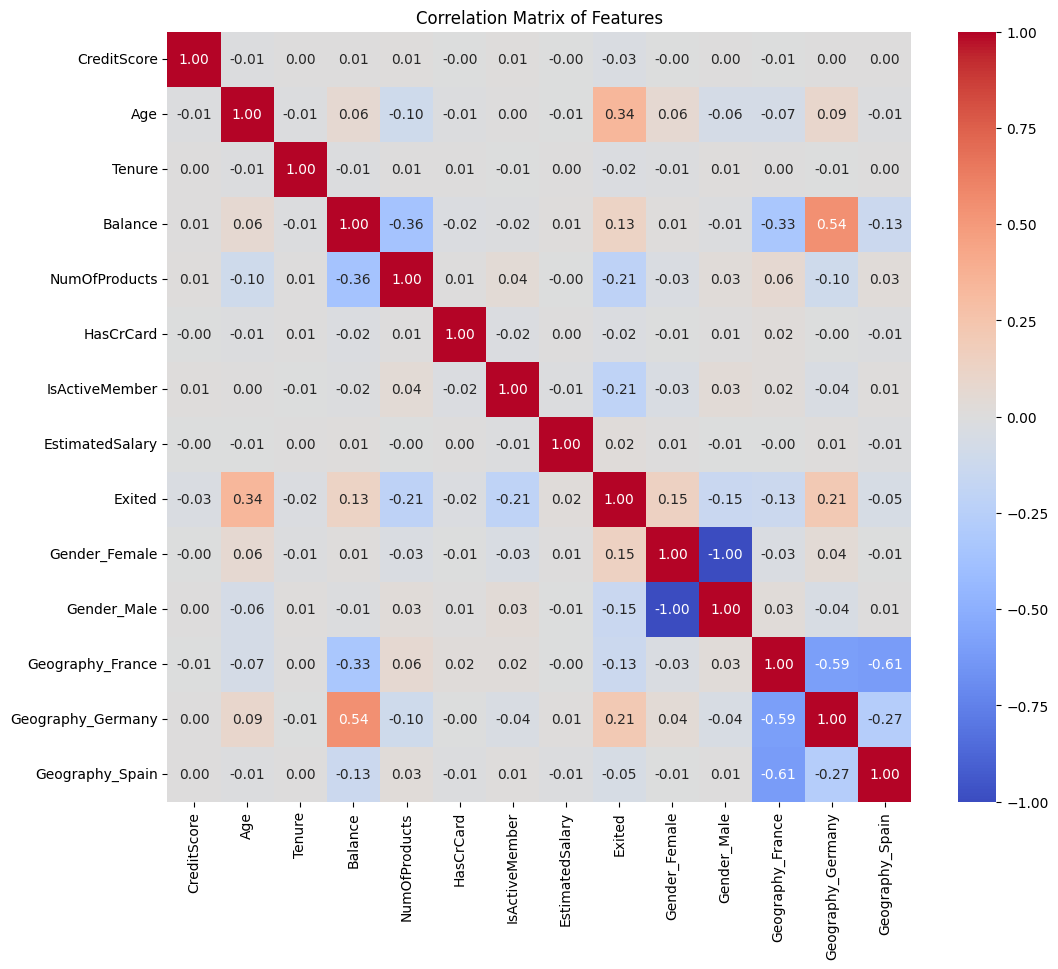

In [ ]:
correlation_matrix = train_data.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
X_train=train_data.drop(['Exited'],axis=1,inplace=False)
y_train=train_data['Exited']

# Machine Learning Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

In [ ]:
for model_name, model in models.items():
    # Fit the model on training data
    model.fit(X_train, y_train)

    # Predict probabilities on training data for evaluation
    y_pred_proba_train = model.predict_proba(X_train)[:, 1]

    # Calculate AUC-ROC score
    auc_score = roc_auc_score(y_train, y_pred_proba_train)

    print(f"Model: {model_name}")
    print(f"AUC-ROC Score: {auc_score:.4f}")


Model: Logistic Regression
AUC-ROC Score: 0.8178
Model: Decision Tree
AUC-ROC Score: 1.0000
Model: Random Forest
AUC-ROC Score: 1.0000


In [ ]:
best_model = models["Random Forest"]
probabilities = best_model.predict_proba(test_data1)[:, 1]  # Get probabilities for the positive class (Exited = 1)

# Prepare submission DataFrame with 'id' and predicted probabilities
submission = pd.DataFrame({'id': test_data['id'], 'Exited': probabilities})

# Save submission file
submission.to_csv('submission.csv', index=False)

print("Submission file created successfully!")

Submission file created successfully!


In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Prepare Features and Target Variable for Training
X = train_data.drop(columns=['Exited'])
y = train_data['Exited']

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning with Grid Search for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                               param_grid=param_grid,
                               scoring='roc_auc',
                               cv=5,
                               verbose=2,
                               n_jobs=-1)

grid_search_rf.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search_rf.best_params_)
print("Best AUC-ROC score from Grid Search: ", grid_search_rf.best_score_)

# Evaluate on validation set
best_rf_model = grid_search_rf.best_estimator_
y_val_pred_proba = best_rf_model.predict_proba(X_val)[:, 1]
val_auc_score = roc_auc_score(y_val, y_val_pred_proba)

print("Validation AUC-ROC Score: ", val_auc_score)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best AUC-ROC score from Grid Search:  0.8866374801410115
Validation AUC-ROC Score:  0.8888529885978196


In [32]:
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb

# Gradient Boosting
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
gbc_pred_proba = gbc.predict_proba(X_val)[:, 1]
gbc_auc = roc_auc_score(y_val, gbc_pred_proba)
print(f"Gradient Boosting Validation AUC-ROC Score: {gbc_auc:.4f}")

# XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred_proba = xgb_model.predict_proba(X_val)[:, 1]
xgb_auc = roc_auc_score(y_val, xgb_pred_proba)
print(f"XGBoost Validation AUC-ROC Score: {xgb_auc:.4f}")

# LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_pred_proba = lgb_model.predict_proba(X_val)[:, 1]
lgb_auc = roc_auc_score(y_val, lgb_pred_proba)
print(f"LightGBM Validation AUC-ROC Score: {lgb_auc:.4f}")


Gradient Boosting Validation AUC-ROC Score: 0.8899
XGBoost Validation AUC-ROC Score: 0.8884
[LightGBM] [Info] Number of positive: 27966, number of negative: 104061
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 862
[LightGBM] [Info] Number of data points in the train set: 132027, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211820 -> initscore=-1.313988
[LightGBM] [Info] Start training from score -1.313988
LightGBM Validation AUC-ROC Score: 0.8910


In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build Neural Network
nn_model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Neural Network
history = nn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32, verbose=1)

# Evaluate Neural Network
nn_pred_proba = nn_model.predict(X_val).ravel()
nn_auc = roc_auc_score(y_val, nn_pred_proba)
print(f"Neural Network Validation AUC-ROC Score: {nn_auc:.4f}")


Epoch 1/30
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8236 - loss: 0.4127 - val_accuracy: 0.8585 - val_loss: 0.3322
Epoch 2/30
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8536 - loss: 0.3474 - val_accuracy: 0.8622 - val_loss: 0.3274
Epoch 3/30
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.8585 - loss: 0.3391 - val_accuracy: 0.8635 - val_loss: 0.3251
Epoch 4/30
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.8590 - loss: 0.3355 - val_accuracy: 0.8640 - val_loss: 0.3258
Epoch 5/30
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.8586 - loss: 0.3359 - val_accuracy: 0.8641 - val_loss: 0.3231
Epoch 6/30
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8601 - loss: 0.3356 - val_accuracy: 0.8617 - val_loss: 0.3252
Epoch 7/30
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8594 - loss: 0.3328 - val_accuracy: 0.8646 - val_loss: 0.3226
Epoch 8/30
4126/4126 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8599 - loss: 0

In [34]:
# Summarize Results
results = {
    "Random Forest": val_auc_score,
    "Gradient Boosting": gbc_auc,
    "XGBoost": xgb_auc,
    "LightGBM": lgb_auc,
    "Neural Network": nn_auc
}

print("Model Comparison (AUC-ROC Scores):")
for model, auc in results.items():
    print(f"{model}: {auc:.4f}")

Model Comparison (AUC-ROC Scores):
Random Forest: 0.8889
Gradient Boosting: 0.8899
XGBoost: 0.8884
LightGBM: 0.8910
Neural Network: 0.8875


In [36]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score

# Define the base models
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Create an ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('gb', gb_model),
    ('xgb', xgb_model)],
    voting='soft'  # Use soft voting to average probabilities
)

# Fit the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Predict probabilities on the validation set
y_val_pred_proba_ensemble = ensemble_model.predict_proba(X_val)[:, 1]

# Calculate AUC-ROC score for the ensemble model
ensemble_auc_score = roc_auc_score(y_val, y_val_pred_proba_ensemble)
print(f"Ensemble Model Validation AUC-ROC Score: {ensemble_auc_score:.4f}")

# Predict probabilities for the test set
test_probabilities_ensemble = ensemble_model.predict_proba(test_data1)[:, 1]

# Prepare the submission DataFrame
submission_ensemble = pd.DataFrame({
    'id': test_data['id'],
    'Exited': test_probabilities_ensemble
})

# Save the submission DataFrame to a CSV file
submission_ensemble.to_csv('submission_ensemble.csv', index=False)

print("Ensemble submission file created successfully! Ready to upload to Kaggle.")

Ensemble Model Validation AUC-ROC Score: 0.8893
Ensemble submission file created successfully! Ready to upload to Kaggle.
